<a href="https://colab.research.google.com/github/magjanvaz/curso-python-us/blob/main/notebooks/matplotlib/introduction-matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(matplotlib)=
# Introducción a matplotlib

In [1]:
import numpy as np
import pandas as  pd
import matplotlib

In [2]:
%config InlineBackend.figure_format='retina'

[Matplotlib](https://matplotlib.org/) es una de las prncipales bibliotecas para gráficos y visualización de datos dentro del ecosistema python en Ciencia de los Datos. Vamos a ver una mínima introducción, lo mejor para familiarizarse con la librería es crear nuestros propios gráficos.

Existen varias maneras de usr matplotlib, pero una de las más comunes es a través de **pyplot**, que nos permitirá una interacción similar a la que se tiene en el sistema MATLAB. 

In [3]:
import matplotlib.pyplot as plt

El siguiente comando nos permite integrarlo en un notebook de Jupyter, y las imágenes saldrán integradas dentro del notebook, bajo la celda que la cree.

Como aperitivo, veamos cómo hacer tres gráficas en una sola figura. En el comenterio correspondiente damos una breve explicación de lo que hace cada comando:

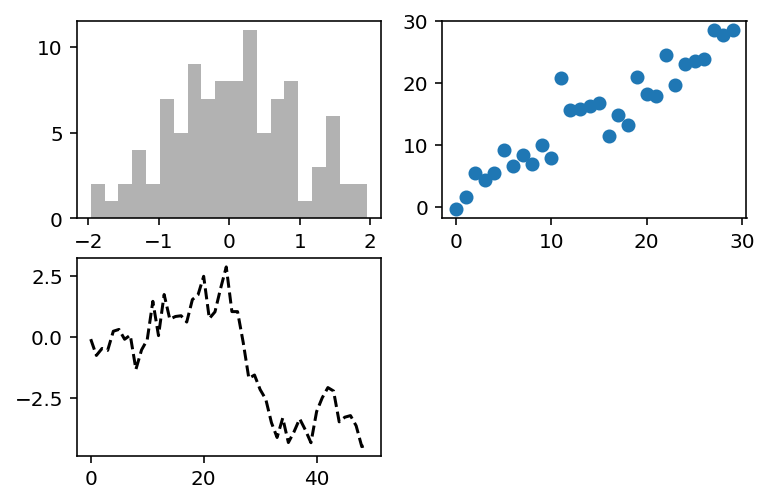

In [5]:
fig = plt.figure() # Se crea una figura (el contenedor de los tres gráficos)
ax1 = fig.add_subplot(2, 2, 1) # En una rejilla 2x2, se crea la primera caja (axes)
ax2 = fig.add_subplot(2, 2, 2) # La segunda caja
fig.add_subplot(2, 2, 3) # La tercera caja


# En la tercera caja (la activa en este momento) dibujamos la gráfica de una función, 
# mediante el método plot
plt.plot(np.random.randn(50).cumsum(), 'k--') 

# Volvemos a la segunda caja, usando el objeto asociado correspondiente, y dibujamos un
# histograma con el método hist
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) 
            
# En la tercera caja, colocamos una nube de puntos con el método scatter    
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) 

plt.show()

---
## Dos interfaces posibles

En el ejemplo anterior hemos mezclados dos "estilos" al crear las gráficas. La gráfica de la tercera caja se crea al ser en ese momento el "subplot" activo. Sin embargo, los dos primeros subplots se han "rellenado" a través del objeto correspondiente (ax1 y ax2). Comentemos con algo más de detalle estos dos estilos: 

### Estilo "MATLAB"

 Basado en `plt` y conocido como "estilo MATLAB", crea la figura y cada uno de los subplots, aplicándose los cambios al último creado en cada momento, que es el que está activo. 

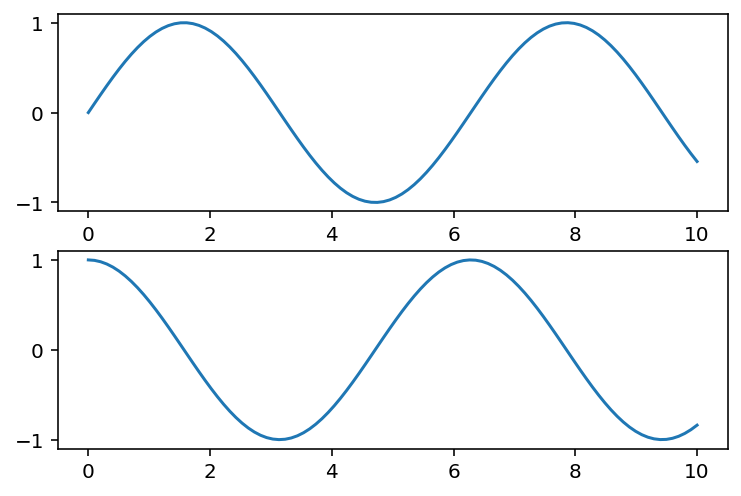

In [6]:
x = np.linspace(0, 10, 100)

plt.figure()  # crea figura

# crea la primera de las dos subfiguras y hace un plor de la fucnión seno
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create la segunda y hace un plot del coseno
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

plt.show()

Inconveniente: una vez estamos en el segundo subplot, ¿cómo podemos volver a hacer algo con el primero? En el estilo basado en objetos que explicamos a continuación esto sí es posible.

### Estilo basado en objetos 

En este caso, sin tener que depender del último objeto activo, los procedimientos de creación de gráficas son métodos de objetos de tipo `Figure` y `Axes`, que se crean al principio, y los cuales "manipulamos" con sus métodos. 

Un objeto de tipo `Figure` se tiene que pensar como un contenedor donde creamos gráficos. Los `Axes` son los distintos gráficos dentro de una figura: cajas con marcas y etiquetas y eventualmente con el gráfico de alguna función, por ejemplo. 

Vamos a repetir los dos gráficos antriores, pero al estilo basado en objetos.

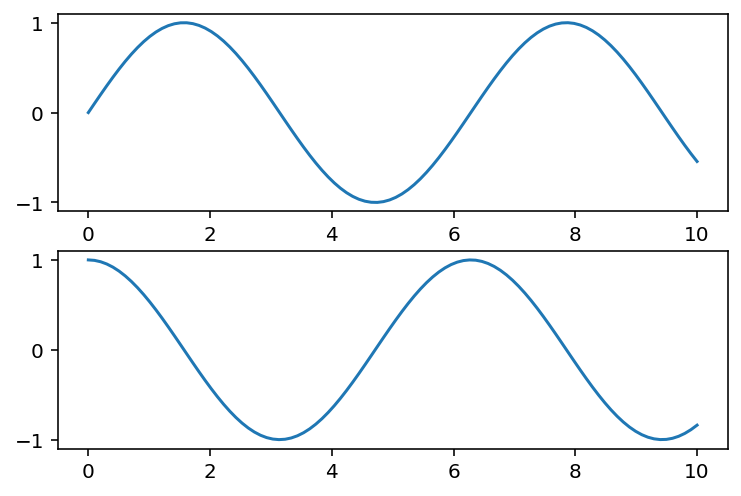

In [7]:
fig, ax = plt.subplots(2) # de esta manera fig es un objeto Figure y 
                          # ax es un array con dos objetos 'Axes' 

# Llamamos al método plot sobre cada uno de los objetos de tipo Axes
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

fig.show() # Ahora llamamos a fig.show()

---
## Gráficas simples con *plot*

Con `plot` creamos una gráfica de una función $y=f(x)$. 

Un ejemplo muy simple:

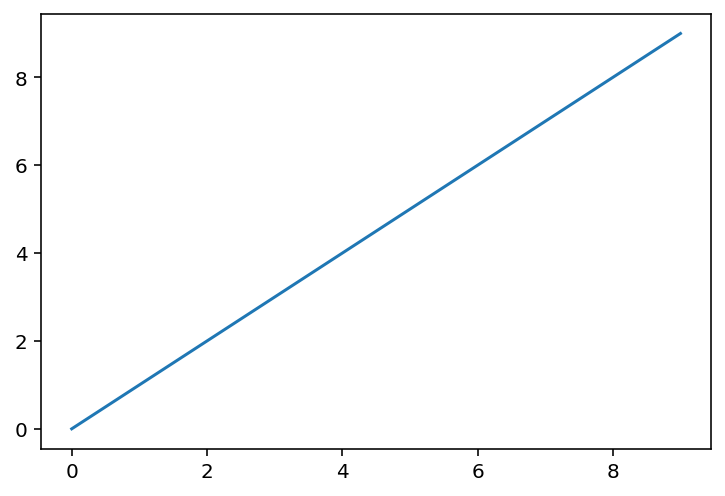

In [20]:
plt.plot(np.arange(10)) 
# sin pasarle un argumento lo que toma son los n primeros números
plt.show()

En este caso, nuestra variable dependiente (la `y`) toma valores en los primeros diez números. Por defecto, si no se da los valores de la variable independiente (la `x`), entonces se toma por defecto el corresponiente rango. Por tanto, en este caso la recta representa la función $y=x$ 

Repetimos ahora la gráfica anterior de la función seno:

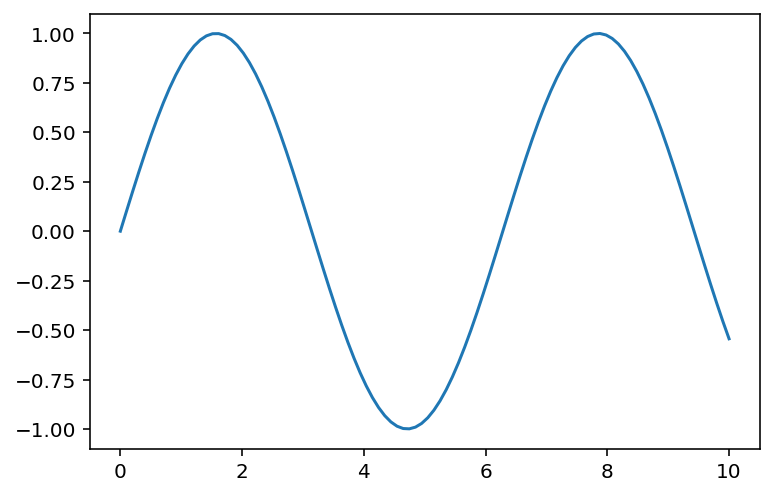

In [21]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.show()

Podemos tener dos gráficas dentro de la misma caja, basta con llamar dos veces a `plt`:

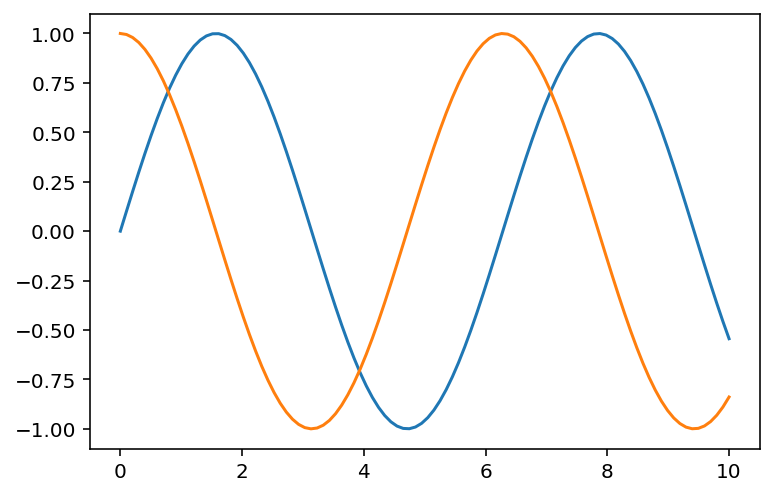

In [22]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
# pinta encima y toma un color distinto
plt.show()

Si queremos hacerlo con el estilo basado en objetos sería algo así 

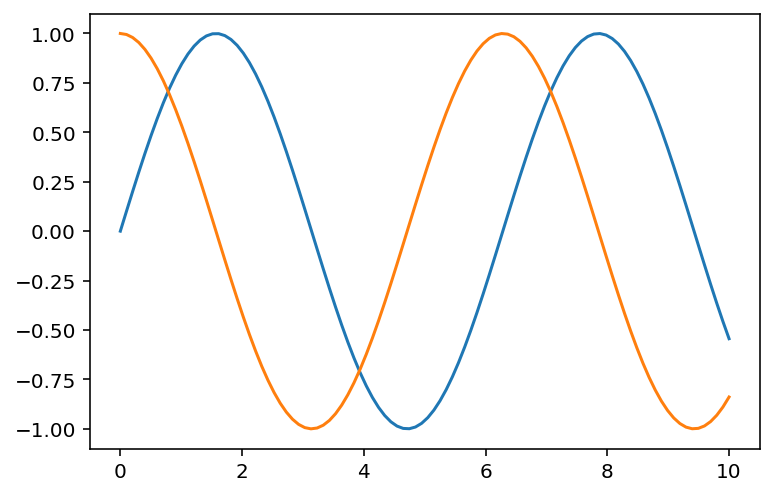

In [23]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
fig.show()

El color de las gráficas se ajusta automáticamente, pero se puede indicar mediante el parámetro `color`de `plot`. He aquí unos cuantos ejemplos:

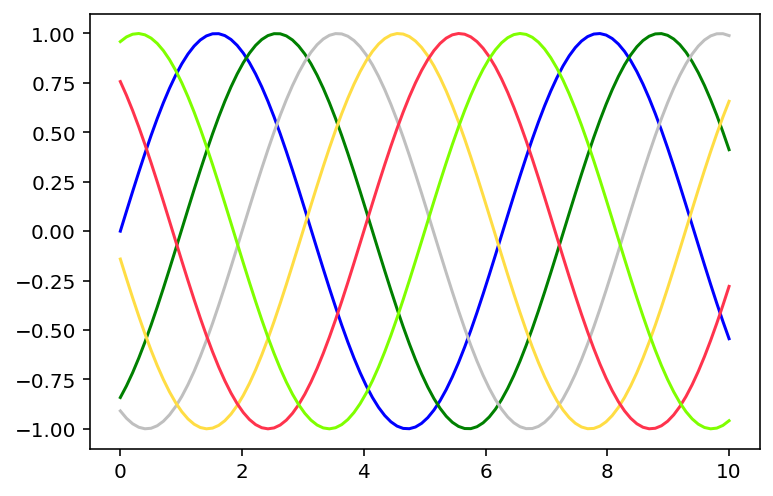

In [24]:
plt.plot(x, np.sin(x - 0), color='blue')        # por nombre de color
plt.plot(x, np.sin(x - 1), color='g')           # código corto del color (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Escala de grises entre 0 y 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex código (RRGGBB desde 00 s FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tupla, valores 0 a 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # colores soportados por HTML
plt.show()

De igual manera, el estilo de dibujo de cada línea se puede dar con `linestyle`. Aquí algunos ejemplos:


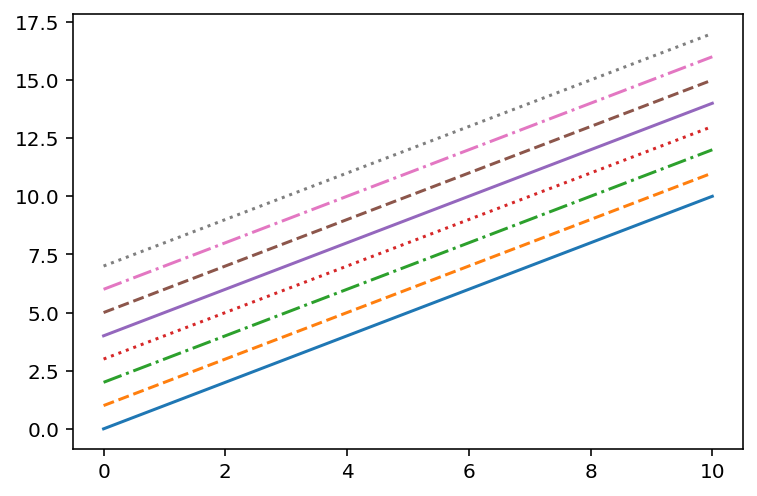

In [25]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# Códigos cortos para lo mismo
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

plt.show()

Los códigos cortos sirven para de manera compacta indicar todas estas catacterísticas. Por ejemplo, conjuntamente el color y el estilo de línea:

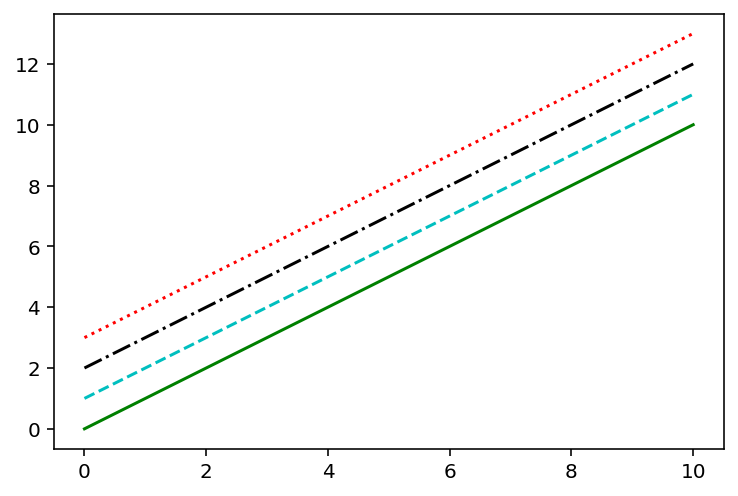

In [26]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

plt.show()

Aunque plot deduce bastante bien los límites de la gráfica, es posible especificar estos límites con `xlim` y `ylim`, com en el ejemplo:

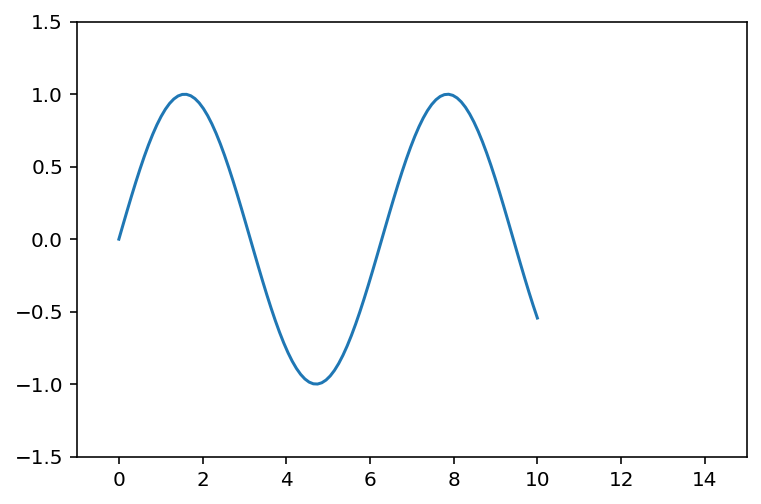

In [27]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 15)
plt.ylim(-1.5, 1.5)

plt.show()

Con el método `axis` podemos dar todos los límites en una sola instrucción. Lo siguiente sería equivalente:

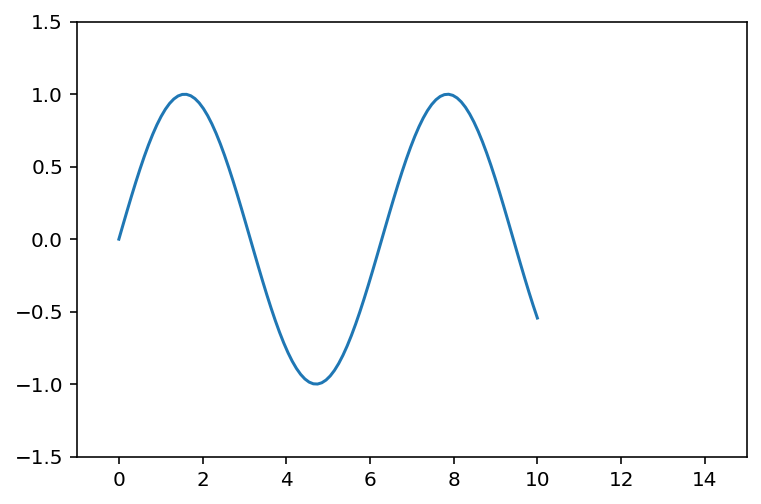

In [28]:
plt.plot(x, np.sin(x))
plt.axis([-1, 15, -1.5, 1.5])

plt.show()

Podemos decirle incluso que ajuste al máximo los límites:

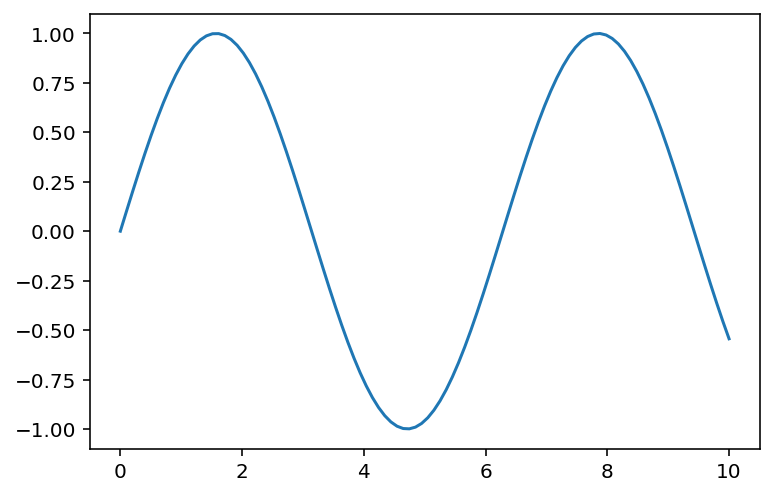

In [29]:
plt.plot(x, np.sin(x))
plt.axis('tight')

plt.show()

O incluse que nos asegure una ratio de aspecto de igual proporcionalidad en ambos ejes:

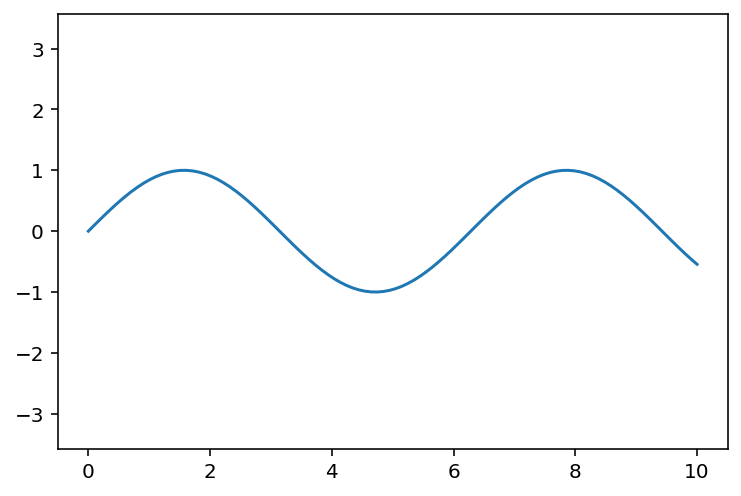

In [30]:
plt.plot(x, np.sin(x))
plt.axis('equal')

plt.show()

Otro punto importante es cómo ponemos etiquetas (podemos incluir fórmulas matemáticas) a distintas partes de las gráficas. Por ejemplo:

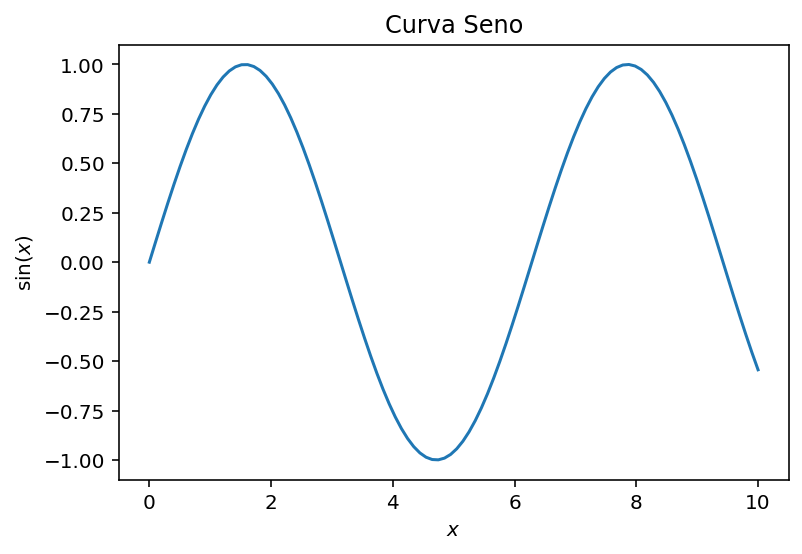

In [31]:
plt.plot(x, np.sin(x))
plt.title("Curva Seno")
plt.xlabel("$x$") # podemos incluir fórmulas matemáticas
plt.ylabel("$\sin(x)$")
plt.show()

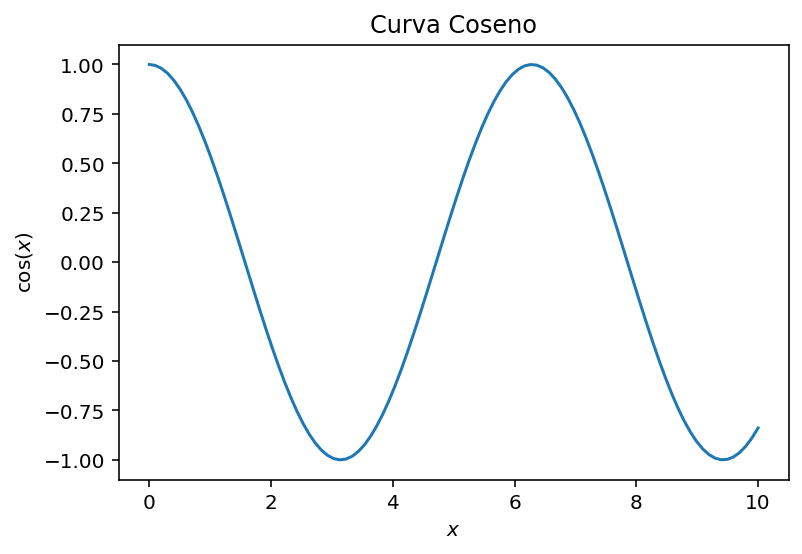

In [32]:
# con el estilo basado en objetos usamos getters y setters
fig, ax = plt.subplots()
ax.plot(x, np.cos(x))
ax.set_title("Curva Coseno")
ax.set_xlabel("$x$")
ax.set_ylabel("$\cos(x)$")
plt.show()

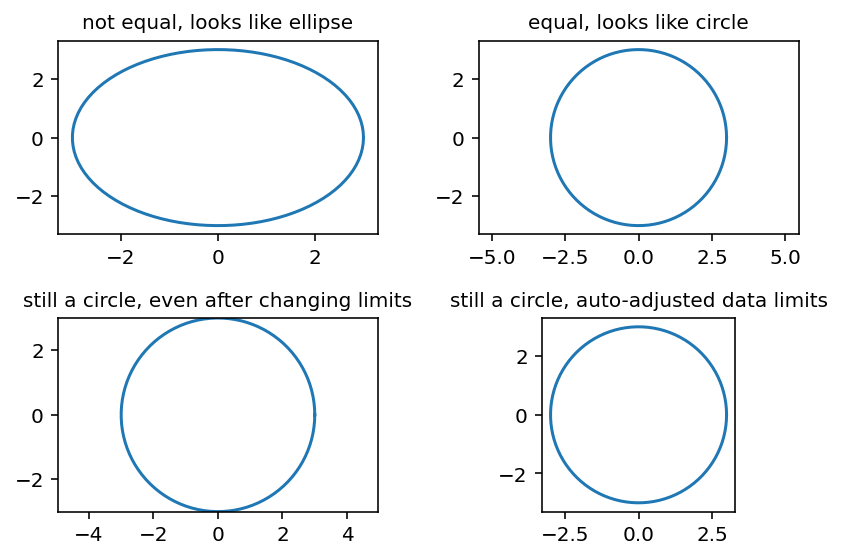

In [33]:
an = np.linspace(0, 2 * np.pi, 100)
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 0].set_title('not equal, looks like ellipse', fontsize=10)

axs[0, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 1].axis('equal')
axs[0, 1].set_title('equal, looks like circle', fontsize=10)

axs[1, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 0].axis('equal')
axs[1, 0].set(xlim=(-3, 3), ylim=(-3, 3))
axs[1, 0].set_title('still a circle, even after changing limits', fontsize=10)

axs[1, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 1].set_aspect('equal', 'box')
axs[1, 1].set_title('still a circle, auto-adjusted data limits', fontsize=10)

fig.tight_layout()

fig.show()

Cuando se muestran múltiples líneas en una sola caja, puede ser útil mostrar una **leyenda** para cada línea. Esto se consigue mediente `plt.legend()`. Nótese también que especificamos la etiqueta de cada línea con el keyword correspondiente en plot.

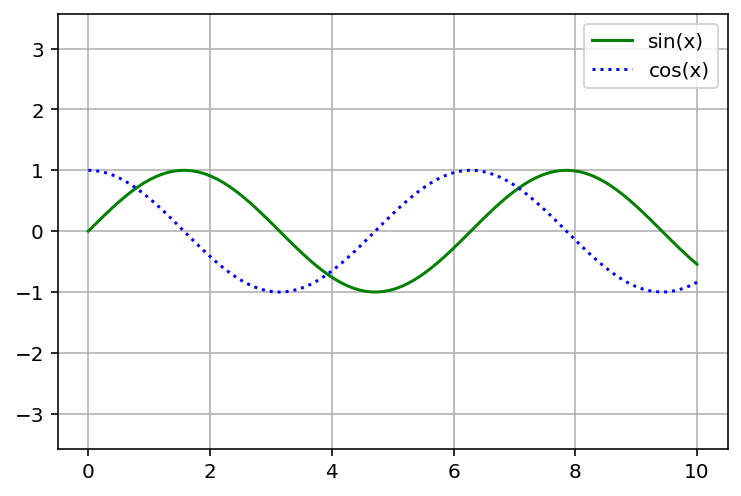

In [34]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.grid() # añadimos grid

plt.legend()
plt.show()

:::{exercise}
:label: matplotlib-cumsum

Crea 4 vectores obtenidos de muestras de una variable aleatoria normal de media 0 y desviación típica 1. Pinta en un gráfico la suma acumulada de los cuatro vectores frente al número de sumandos, utilizando diferentes colores y estilos de línea para cada uno. Añade
- Etiqueta de los ejes x e y, 
- Título, 
- Grilla,
- Legenda para cada suma acumulada.

Luego haz lo mismo para la media acumulada y añade ambos *ejes* en la misma figura. 

:::

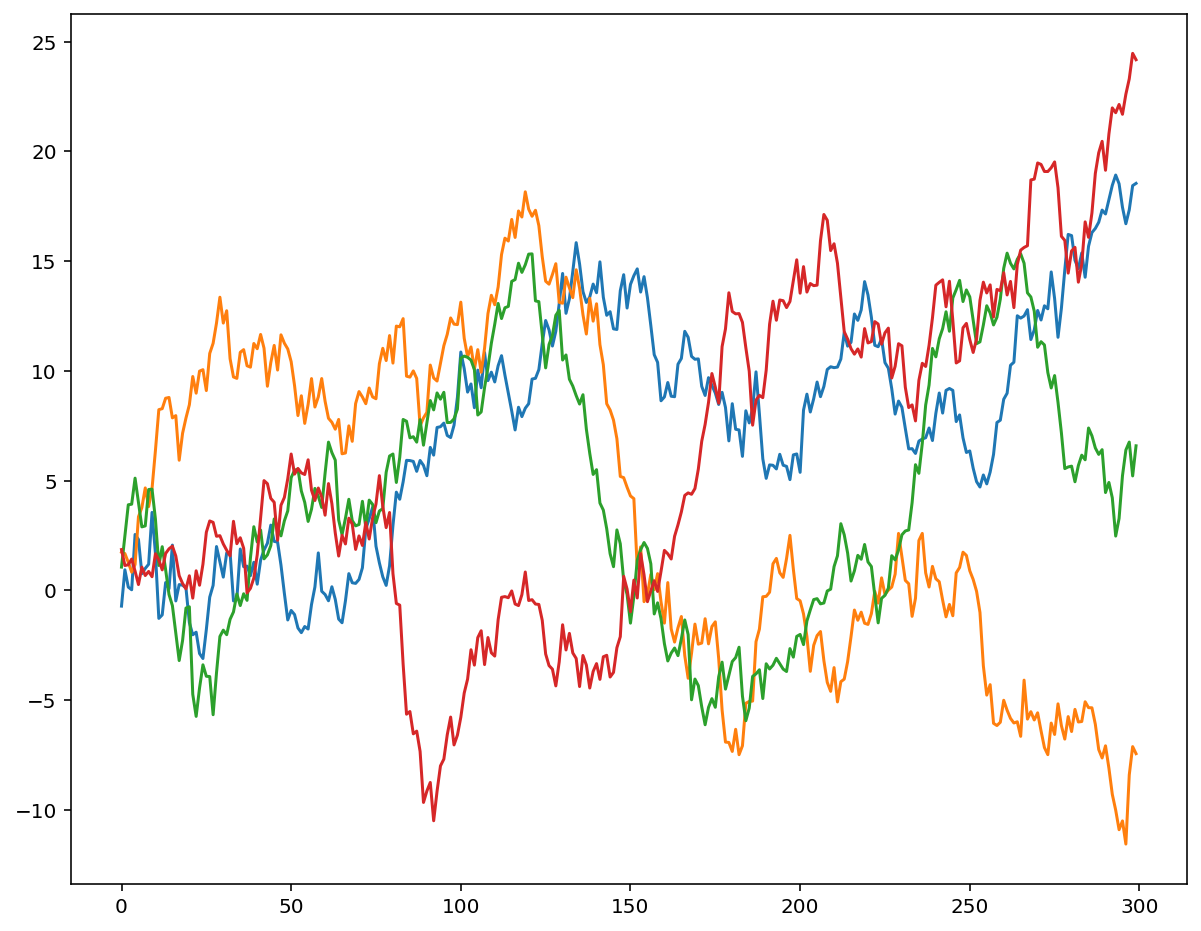

In [39]:
fig, ax = plt.subplots(figsize=(10,8))

import numpy as np
rng= np.random.default_rng()
v = rng.standard_normal((300,4))
v_cs = v.cumsum(axis=0)

for i in range(4):
  ax.plot(v_cs[:,i])

fig.show()

---
## Nubes de puntos 

Otra gráfica muy básica dentro de matplotlib son las nubes de puntos. En lugar de unir los puntos con líneas como con `plot`, se representa cada punto de manera individual, con su propia estructura. Lo haremos con el método `scatter`.

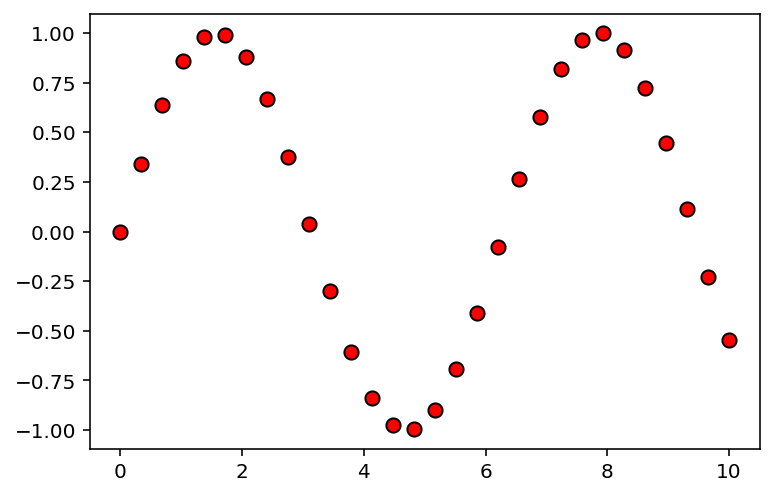

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y, marker="o", s=50, facecolor='r', edgecolor='k')
plt.show()

El parámetro clave `marker` indica la forma del punto (en este caso, un círculo). Aefectos ilustrativos, la siguiente figura muestra distintos códigos para esa marca y el aspacto que tienen:

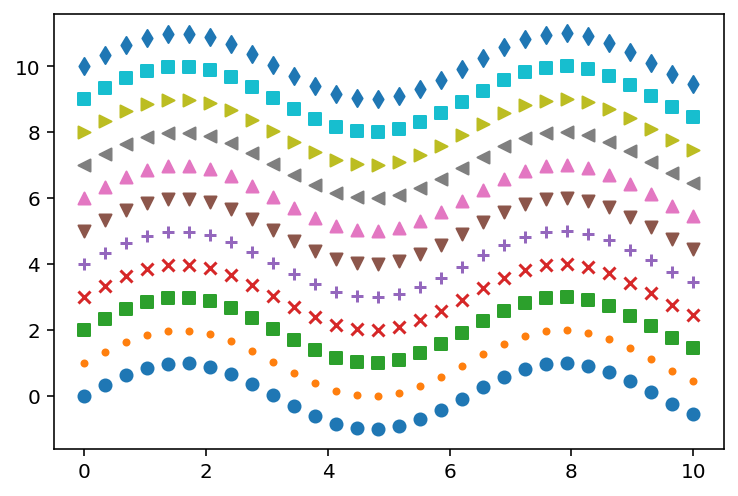

In [ ]:
for i,marker in enumerate(['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']):
    plt.scatter(x, y+i, marker=marker)

plt.show() 

---
## Parámetros globales de matplotlib

Podemos configurar parámetros de forma global modificando el objeto `rcParams` de `matplotlib`. 

In [ ]:
import matplotlib as mpl

In [ ]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'

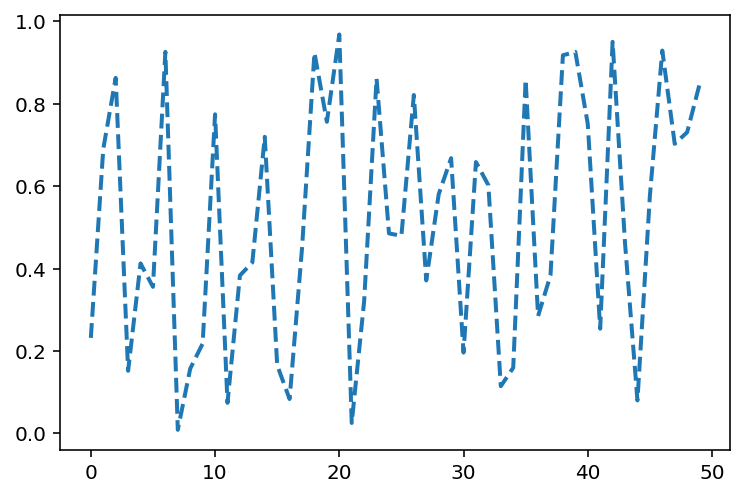

In [ ]:
data = np.random.rand(50)
plt.plot(data)
plt.show()

Podemos volver a la configuración por defecto 

In [ ]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

También podemos cambiar la configuración temporalmente con un gestor de contexto

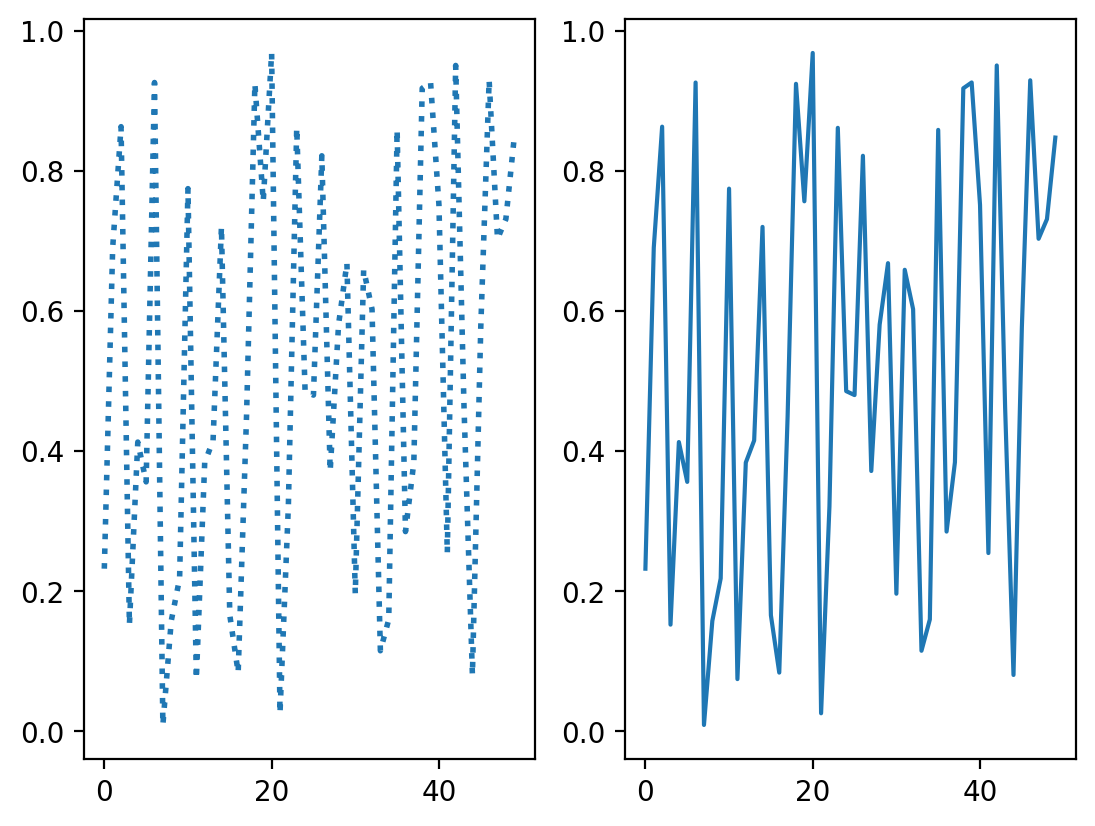

In [ ]:
fig, ax = plt.subplots(1, 2)

with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
    ax[0].plot(data)
ax[1].plot(data)

fig.show()

Existen una [gran cantidad de estilos predefinidos en matplotlib](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Podemos seleccionar uno de ellos con `plt.style.use(<style-name>)`

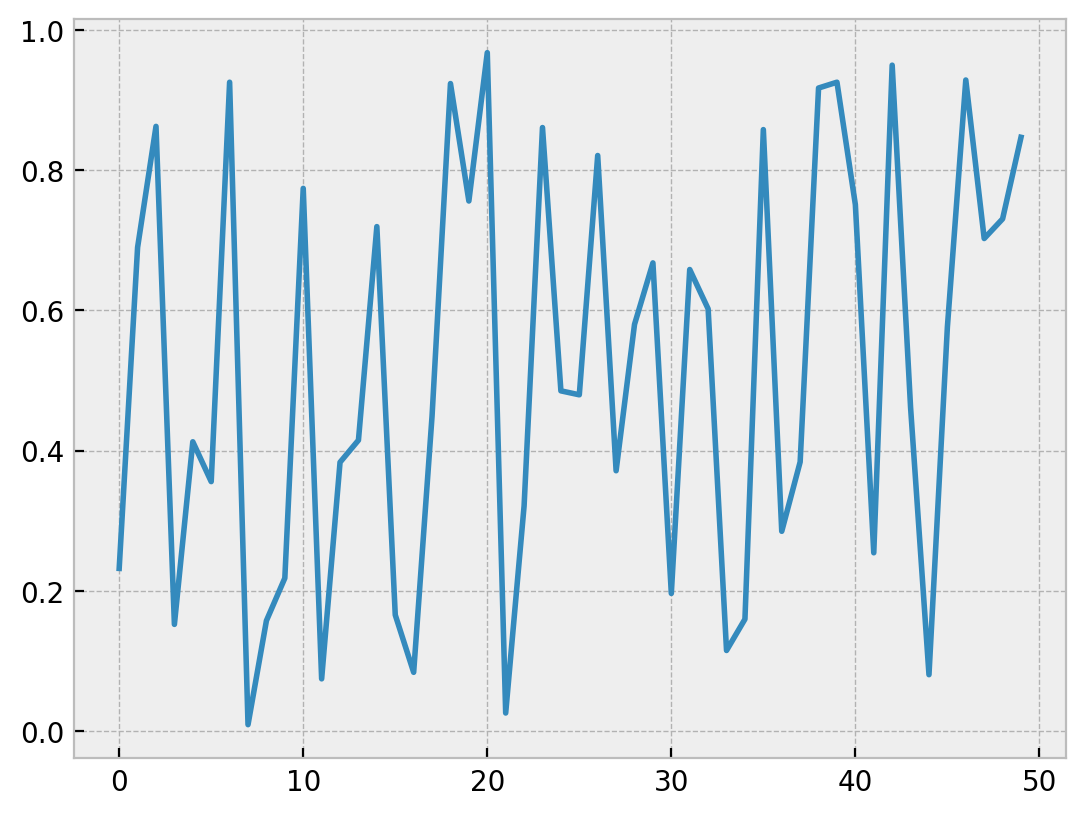

In [ ]:
plt.style.use("bmh")
plt.plot(data)
plt.show()

Vemos como cambian la fuente y tamaño de las etiquetas de los ejes, el grosos de línea, el grid, color de fondo ... 

Incluso se pueden hacer plots al estilo [xkcd](https://xkcd.com/)

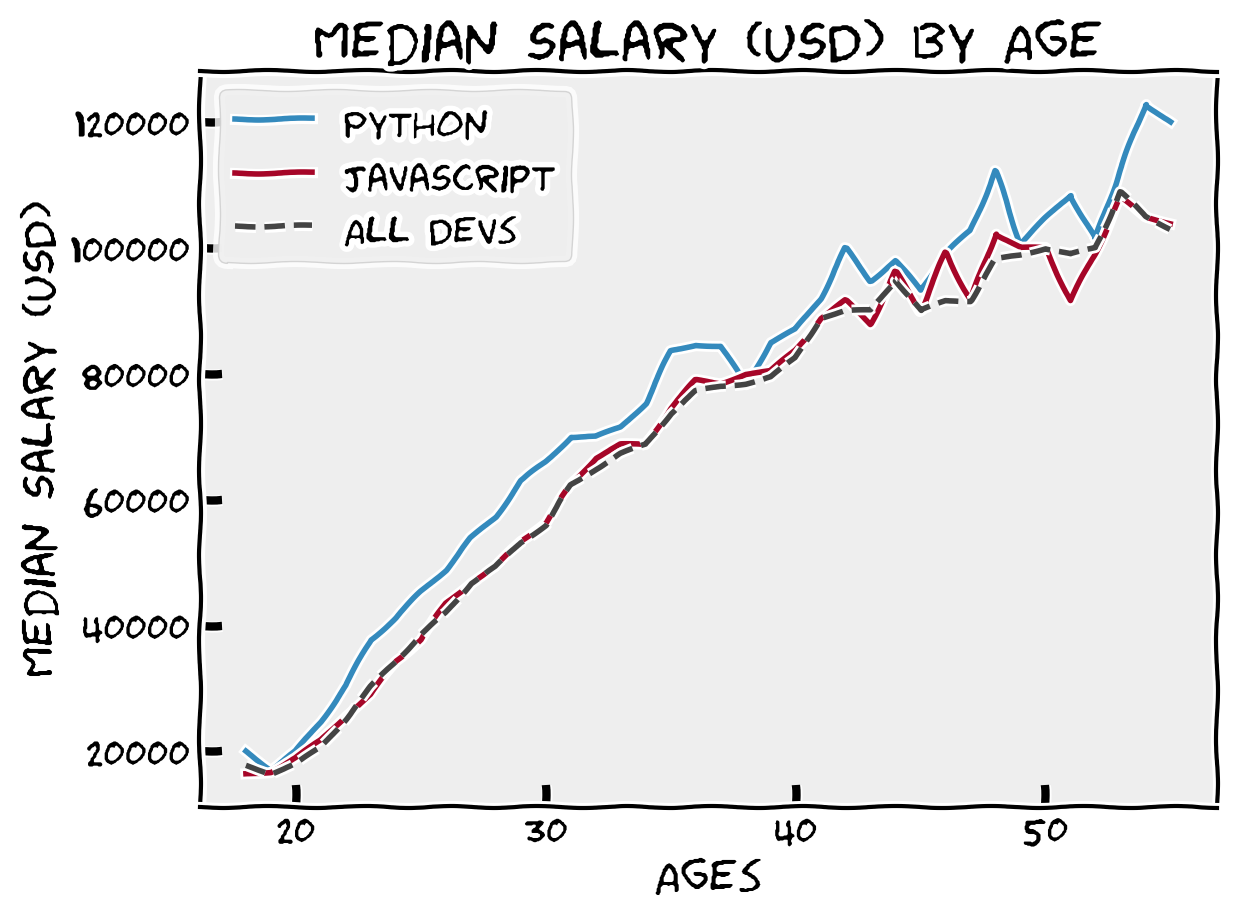

In [ ]:

from matplotlib import pyplot as plt

plt.xkcd()

ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
            84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]
plt.plot(ages_x, py_dev_y, label='Python')

js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
            78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
plt.plot(ages_x, js_dev_y, label='JavaScript')

dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]
plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.tight_layout()

plt.show()

Finalmente, podemos guardar imágenes en distintos formatos (incluido svg) utilizando `plt.savefig`.